# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import TensorFlow 
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

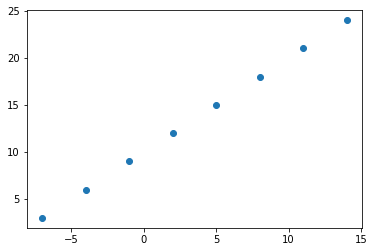

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([ -7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

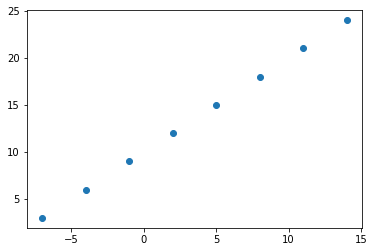

In [8]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improce the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short for mean absolute error
              optimizer= tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent,
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 9.8027 - mae: 9.8027
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 9.6702 - mae: 9.6702
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 9.5377 - mae: 9.5377
Epoch 4/5
1/1 [==============================] - 0s 68ms/step - loss: 9.4052 - mae: 9.4052
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 9.2727 - mae: 9.2727


In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 381ms/step


array([[20.98341]], dtype=float32)

In [12]:
y_pred + 11

array([[31.98341]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** = we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden laters, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for mor **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 990ms/step - loss: 11.3486 - mae: 11.3486
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 11.2161 - mae: 11.2161
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 11.0836 - mae: 11.0836
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 10.9511 - mae: 10.9511
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8186 - mae: 10.8186
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 10.6861 - mae: 10.6861
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 10.5536 - mae: 10.5536
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 10.4211 - mae: 10.4211
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 10.2886 - mae: 10.2886
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 10.1561 - mae: 10.1561
Epoch 11/100
1/1 [==============================

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 215ms/step


array([[29.721931]], dtype=float32)

In [16]:
# Lets try adding another layer in our create model
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.0183 - mae: 14.0183
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.5142 - mae: 13.5142
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 13.0170 - mae: 13.0170
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.5223 - mae: 12.5223
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 12.0426 - mae: 12.0426
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 11.5555 - mae: 11.5555
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0460 - mae: 11.0460
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 10.5170 - mae: 10.5170
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 9.9636 - mae: 9.9636
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 9.3818 - mae: 9.3818
Epoch 11/100
1/1 [==============================] - 0s 

In [17]:
# Lets try adding another layer in our create model
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.9358 - mae: 13.9358
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 13.3967 - mae: 13.3967
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 12.9191 - mae: 12.9191
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 12.4759 - mae: 12.4759
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 11.9724 - mae: 11.9724
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 11.4204 - mae: 11.4204
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 10.7871 - mae: 10.7871
Epoch 8/100
1/1 [==============================] - 0s 41ms/step - loss: 10.0311 - mae: 10.0311
Epoch 9/100
1/1 [==============================] - 0s 37ms/step - loss: 9.0948 - mae: 9.0948
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 7.8773 - mae: 7.8773
Epoch 11/100
1/1 [==============================] - 0s 

In [18]:
# Let's see if prediction improved
model.predict([17.0])

1/1 [==============================] - 0s 165ms/step


array([[32.984035]], dtype=float32)

In [19]:
# Lets try adding another layer in our create model
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4070 - mae: 13.4070
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9692 - mae: 12.9692
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5364 - mae: 12.5364
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0840 - mae: 12.0840
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6338 - mae: 11.6338
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2410 - mae: 11.2410
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9049 - mae: 10.9049
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5892 - mae: 10.5892
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2651 - mae: 10.2651
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9260 - mae: 9.9260
Epoch 11/100
1/1 [==============================] - 0

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[31.818851]], dtype=float32)

### Common ways to improve a deep learning model:

* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

**Note:** Just because you seen an improvement of the loss and mae doesn't mean predictions will be better.  This could mean your model is overfitting (learning the training model better).  Model's efficiency is determine by their predictions, not the metrics obtained when fitting the model.

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the orginal labels)?


In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

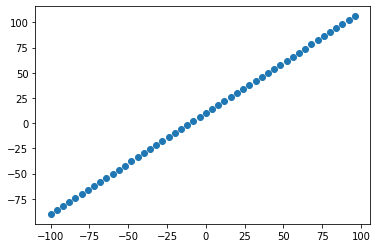

In [23]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15 % of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data avaliable

In [24]:
# Check the length of how many samples we have

In [25]:
### The 3 sets...
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [26]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets...let's visualize it again


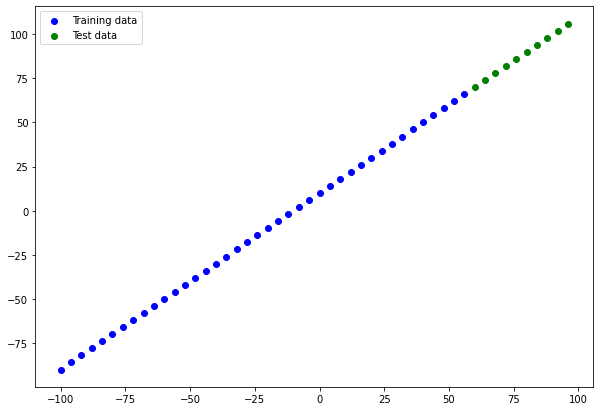

In [27]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
# Show legend
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

ValueError: ignored

In [30]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updatated during training (this is typical when you bring in already learn patters or parameters from other models during transfer learning)

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's to deep learning video

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

In [33]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [34]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


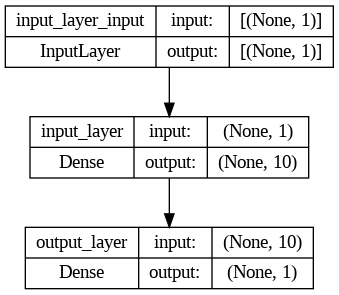

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus you model)

In [36]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 67ms/step


array([[ 69.06739 ],
       [ 72.9978  ],
       [ 76.928215],
       [ 80.85862 ],
       [ 84.78903 ],
       [ 88.719444],
       [ 92.64985 ],
       [ 96.58025 ],
       [100.51067 ],
       [104.441086]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, its a good idea to turn it into a function.

In [38]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data, and compares predictions to ground truth label
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend();

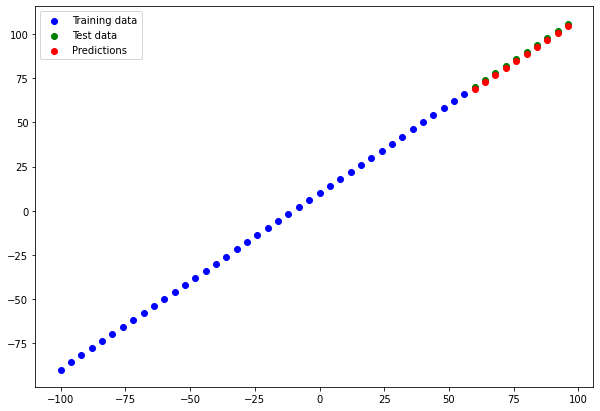

In [39]:
plot_predictions()

### Evaluating our model's predictions with regression evaluations metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, tow of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [40]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 170ms/step - loss: 1.2458 - mae: 1.2458


[1.245762586593628, 1.245762586593628]

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.93261  , 15.601758 , 13.043071 , 11.256552 , 10.242193 ,
       10.       , 10.52997  , 11.832102 , 13.9064045, 16.752869 ],
      dtype=float32)>

In [42]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.06739 ],
       [ 72.9978  ],
       [ 76.928215],
       [ 80.85862 ],
       [ 84.78903 ],
       [ 88.719444],
       [ 92.64985 ],
       [ 96.58025 ],
       [100.51067 ],
       [104.441086]], dtype=float32)>

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.06739 ,  72.9978  ,  76.928215,  80.85862 ,  84.78903 ,
        88.719444,  92.64985 ,  96.58025 , 100.51067 , 104.441086],
      dtype=float32)>

In [45]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2457634>

In [46]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.5918794>

In [47]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_preds))
  
def mse(y_true, y_preds):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_preds))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Tain for longer - give your model more of a chance t find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the orginal model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 17.6613 - mae: 17.6613
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1017 - mae: 12.1017
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.3618 - mae: 11.3618
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5122 - mae: 9.5122
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4141 - mae: 10.4141
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.6465 - mae: 9.6465
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7505 - mae: 8.7505
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0551 - mae: 9.0551
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.2109 - mae: 19.2109
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3665 - mae: 10.3665
Epoch 11/100
2/2 [==============================] - 0s 11ms/st

In [49]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1/1 [==============================] - 0s 63ms/step


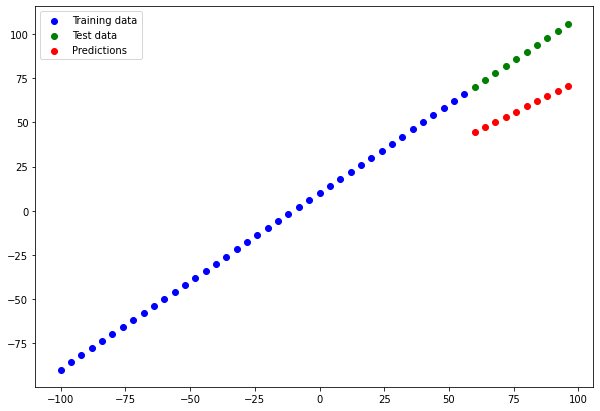

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.401577>,
 <tf.Tensor: shape=(), dtype=float32, numpy=934.4971>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [52]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 28.3322 - mae: 28.3322
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 25.4713 - mae: 25.4713
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 30.2958 - mae: 30.2958
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 16.2583 - mae: 16.2583
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 22.1552 - mae: 22.1552
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6066 - mae: 11.6066
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.7079 - mae: 12.7079
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1185 - mae: 11.1185
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.2899 - mae: 40.2899
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.7074 - mae: 27.7074
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 100ms/step


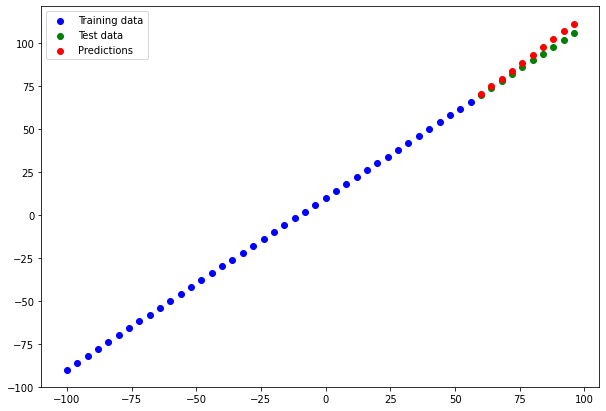

In [53]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [54]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9007995>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.132086>)

**Build `model_3`**

In [55]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 21ms/step - loss: 77.8224 - mae: 77.8224
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 29.6168 - mae: 29.6168
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 20.5147 - mae: 20.5147
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 13.2935 - mae: 13.2935
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 17.4236 - mae: 17.4236
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 10.2044 - mae: 10.2044
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1870 - mae: 11.1870
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1355 - mae: 11.1355
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.6202 - mae: 40.6202
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.9916 - mae: 27.9916
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 151ms/step


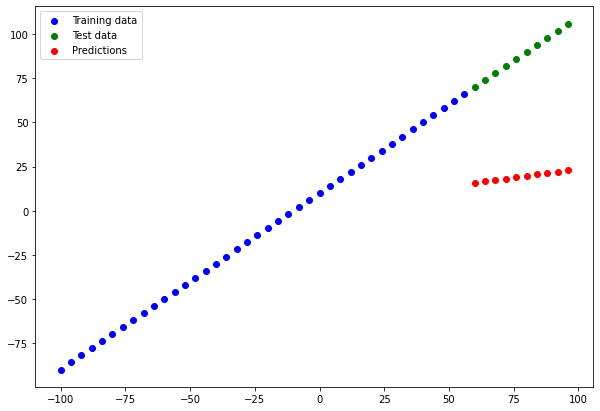

In [56]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [57]:
# Graph above is a great example of a model overfitting (memorizing the training data too much)

# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.64369>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4798.542>)

**Note:** Tou want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments,let's compare the results

In [58]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model,30.401577,934.497070
1,model_2,2.900800,11.132086


In [59]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you will get closer to figuring out what does work.  Remember the machine learning practioner's motot: "experiment, experiment, experiment."

Did not add 3rd model as it errored out due to goodle colab.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, thre are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [60]:
# Save model using the SaveModel format
model_1.save(filepath="best_model_SavedModel_format")

In [61]:
# Save model using the HDF5 format
model_1.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [62]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compare model_1 predictions with SavedModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [67]:
mae(y_true=y_test, y_preds=model_1_preds) == mae(y_true=y_test, y_preds=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [68]:
model_1_preds.squeeze()

array([44.612103, 47.49795 , 50.3838  , 53.26965 , 56.1555  , 59.041348,
       61.927193, 64.81304 , 67.69889 , 70.58473 ], dtype=float32)

In [69]:
loaded_SavedModel_format_preds.squeeze()

array([44.612103, 47.49795 , 50.3838  , 53.26965 , 56.1555  , 59.041348,
       61.927193, 64.81304 , 67.69889 , 70.58473 ], dtype=float32)

In [72]:
# Load in a model using the h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Check to see if loaded .h5 model predictions match model_1
model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 147ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below.)

In [ ]:
# Download a file from Google Colab
from google.colab import files
# files.Download("best_model_HDF5_format.h5")

In [74]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
#!cp best_model_HDF5_format.h5 drive/MyDrive/models

## A larger example

In [76]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [83]:
# Create X & y values (features and labels)
# Create training and test sets
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
len(X_train), len(X_test), len(X)

(1070, 268, 1338)

In [88]:
# Build a neural network (sort of like model_2)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8662.4561 - mae: 8662.4561
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7866.2383 - mae: 7866.2383
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7608.1572 - mae: 7608.1572
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7802.6099 - mae: 7802.6099
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7703.1929 - mae: 7703.1929
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7609.6357 - mae: 7609.6357
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7527.4668 - mae: 7527.4668
Epoch 8/100
34/34 [==============================] - 1s 22ms/step - loss: 7802.9292 - mae: 7802.9292
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.2334 - mae: 7576.2334
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7755.4297 - mae: 7755.429

In [89]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6984.2505 - mae: 6984.2505


[6984.25048828125, 6984.25048828125]

In [90]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer (SGD created Nan values/too complex for our model)
2. Train for longer (200 epochs)
3. (insert your own experiment here)


In [94]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13297.4189 - mae: 13297.4189
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13132.0703 - mae: 13132.0703
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12777.8242 - mae: 12777.8242
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12073.2188 - mae: 12073.2188
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10894.4141 - mae: 10894.4141
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9415.1982 - mae: 9415.1982
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8102.5039 - mae: 8102.5039
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7513.6475 - mae: 7513.6475
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7424.7017 - mae: 7424.7017
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7404.3984 - mae:

In [95]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 4745.7129 - mae: 4745.7129


[4745.712890625, 4745.712890625]

In [96]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 6984.2505 - mae: 6984.2505


[6984.25048828125, 6984.25048828125]

In [97]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13281.4434 - mae: 13281.4434
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13098.0312 - mae: 13098.0312
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12733.8369 - mae: 12733.8369
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12045.8750 - mae: 12045.8750
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10916.3633 - mae: 10916.3633
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9489.3965 - mae: 9489.3965
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8179.0254 - mae: 8179.0254
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7543.2910 - mae: 7543.2910
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7433.8130 - mae: 7433.8130
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7412.2993 - mae:

In [98]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3503.0503 - mae: 3503.0503


[3503.05029296875, 3503.05029296875]

In [99]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6984.2505 - mae: 6984.2505


[6984.25048828125, 6984.25048828125]

Epoch 1/200
34/34 [==============================] - 0s 4ms/step - loss: 3671.8179 - mae: 3671.8179
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 3665.4619 - mae: 3665.4619
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 3669.2915 - mae: 3669.2915
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 3663.1135 - mae: 3663.1135
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 3661.9661 - mae: 3661.9661
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 3671.0906 - mae: 3671.0906
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 3662.0247 - mae: 3662.0247
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 3658.2136 - mae: 3658.2136
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 3655.1011 - mae: 3655.1011
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 3664.0137 - mae: 3664.0137

Text(0.5, 0, 'epochs')

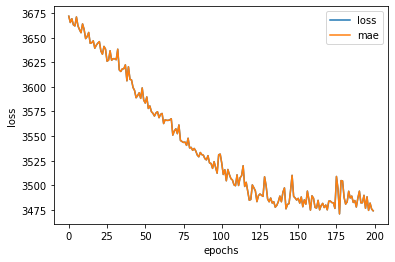

In [100]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(insurance_model_3.fit(X_train, y_train, epochs=200).history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

The graph above underwent two training sessions due to fitting model twice.  For more accurate graph, store fit method into a variable while fitting, then use .history to plot

**Question:** How long should you train for?

It depends.  Really... it depends on the problem you're working on.  However, many people have asked this question before... so TensorFlow has a solution!  It's called the EarlyStopping callback.  This is a TensorFlow component you add to your model to stop training when a metric stops improving.

## Preprocessing data (normalization and standization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [102]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [104]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [103]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [105]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.  Now let's build a neural network model on it and see how it goes.

In [106]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13343.2979 - mae: 13343.2979
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 13333.7393 - mae: 13333.7393
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13309.6416 - mae: 13309.6416
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13260.3760 - mae: 13260.3760
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13175.3047 - mae: 13175.3047
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 13043.6729 - mae: 13043.6729
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 12855.3252 - mae: 12855.3252
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12600.2217 - mae: 12600.2217
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 12268.2520 - mae: 12268.2520
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11857.3

In [107]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3437.4302 - mae: 3437.4302


[3437.43017578125, 3437.43017578125]